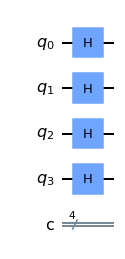

In [31]:
from ibm_quantum_widgets import CircuitComposer
from qiskit import Aer,execute
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit
from numpy import pi
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.visualization import plot_histogram
import qiskit.quantum_info as qi
from qiskit.visualization import plot_state_city

#Preparing the input state

qreg_q = QuantumRegister(4, 'q')
creg_c = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qreg_q, creg_c)

circuit.h(qreg_q[0])
circuit.h(qreg_q[2])
circuit.h(qreg_q[3])
circuit.h(qreg_q[1])
circuit.draw()

In [33]:
# obtain density matrix before compression
rho1 = qi.DensityMatrix.from_instruction(circuit)
rho1.draw('latex', prefix='\\rho = ')


<IPython.core.display.Latex object>

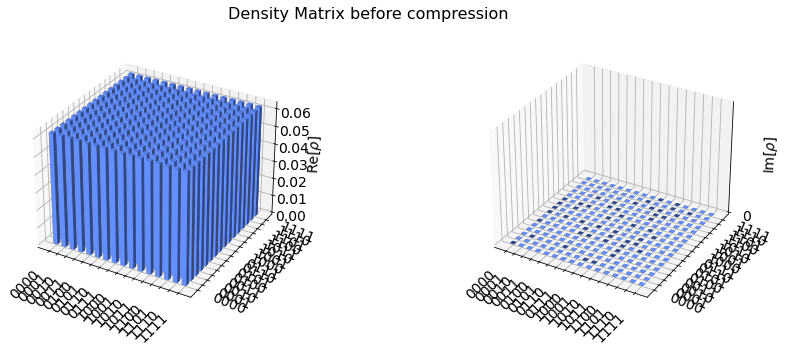

In [54]:
# visualizing the density matrix before compression
plot_state_city(rho1.data, title='Density Matrix before compression')

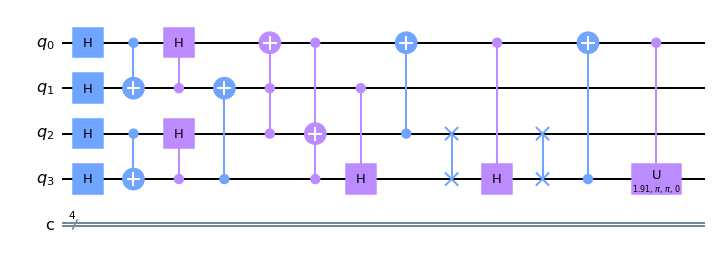

In [36]:
#Compression circuit
circuit.cx(qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[0], qreg_q[1])
circuit.ch(qreg_q[3], qreg_q[2])
circuit.ch(qreg_q[1], qreg_q[0])
#circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[1])
circuit.ccx(qreg_q[1], qreg_q[2], qreg_q[0])
circuit.ccx(qreg_q[0], qreg_q[3], qreg_q[2])
circuit.ch(qreg_q[1], qreg_q[3])
#circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[2], qreg_q[0])
circuit.swap(qreg_q[2], qreg_q[3])
circuit.ch(qreg_q[0], qreg_q[3])
circuit.swap(qreg_q[2], qreg_q[3])
circuit.cx(qreg_q[3], qreg_q[0])
circuit.cu(1.91063, pi , pi , 0, qreg_q[0], qreg_q[3])


circuit.draw()

In [37]:
#obtain density matrix after compression
rho2 = qi.DensityMatrix.from_instruction(circuit)
rho2.draw('latex', prefix='\\rho = ')

<IPython.core.display.Latex object>

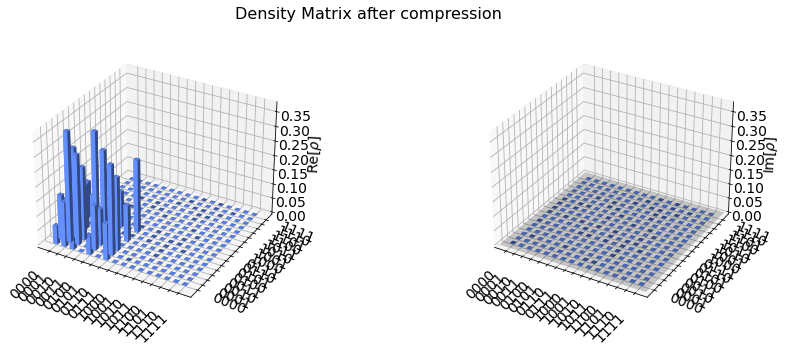

In [55]:
# visualizing the density matrix after compression
plot_state_city(rho2.data, title='Density Matrix after compression')

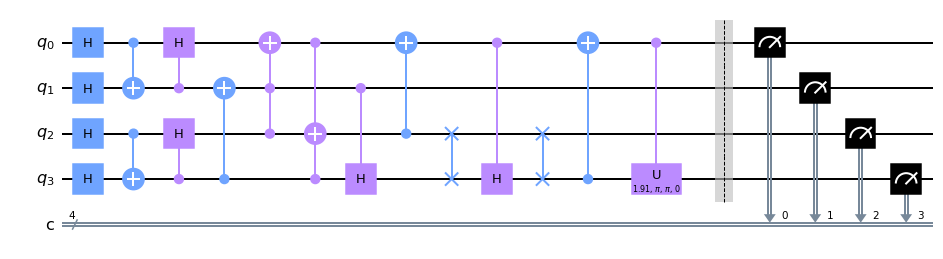

In [39]:
#measurement of circuit
circuit.barrier(qreg_q[0], qreg_q[1], qreg_q[2], qreg_q[3])
circuit.measure(qreg_q[0], creg_c[0])
circuit.measure(qreg_q[1], creg_c[1])
circuit.measure(qreg_q[2], creg_c[2])
circuit.measure(qreg_q[3], creg_c[3])
circuit.draw()

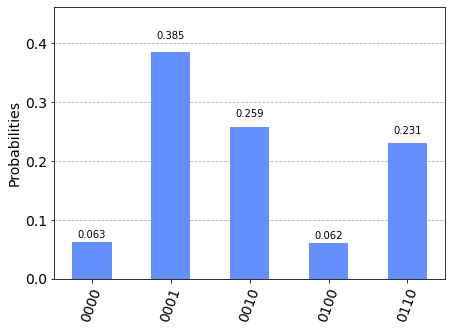

In [40]:
sim = Aer.get_backend('qasm_simulator')
shots = 4096
results = execute(circuit,sim).result().get_counts()

plot_histogram(results)
#t_circuit = transpile(circuit, sim)
#qobj = assemble(circuit, shots=shots)
#results = aer_sim.run(qobj).result()
#answer = results.get_counts()

#plot_histogram(answer)


